<a href="https://colab.research.google.com/github/JoaoVPereira/Previsao-do-brasileirao-com-Machine-Learning-TCC-/blob/main/Previs%C3%A3oBrasileir%C3%A3oSmote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando a base

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
brasileirao = pd.read_excel('/content/brasileirao_serie_a_Oficial.xlsx')

In [ ]:
brasileirao.columns

Index(['GameID', 'Campeonato', 'Rodada', 'Data', 'Arena', 'Id_Arena',
       'Horario', 'Dia', 'Time_Mandante', 'ID_Mandante', 'Time_Visitante',
       'ID_Visitante', 'Mandante_Placar', 'Visitante_Placar', 'Resultado',
       'Elo Mandante', 'Elo Visitante', 'Força Ofensiva Time Casa',
       'Força Ofensiva Time Visitante', 'Força Defensiva Time Casa',
       'Força Defensiva Time Visitante', 'Perc_CasaV', 'Perc_CasaE',
       'Perc_VisitV', 'Perc_VisitE', 'Vitoria Temporada Time Casa',
       'Empate Temporada Time Casa', 'Derrota Temporada Time Casa',
       'Vitoria Temporada Time Visitante', 'Empate Temporada Time Visitante',
       'Derrota Temporada Time Visitante'],
      dtype='object')

In [ ]:
base_brasileirao1 = pd.read_excel('/content/Brasileirao_atualizado.xlsx')
base_brasileirao = base_brasileirao1.drop(columns = ['Unnamed: 0', 'Confronto Empate', 'Confronto Visitante', 'Confronto Mandante', 'Days Between Away', 'Days Between'])
base_brasileirao.tail(5)

,Resultado,Rodada,Id_Arena,ID_Mandante,ID_Visitante,Elo Mandante,Elo Visitante,Força Ofensiva Time Casa,Força Ofensiva Time Visitante,Força Defensiva Time Casa,...,Derrota Temporada Time Visitante,Temporada,Streak Vitória Mandante,Streak Derrota Mandante,Streak Vitória Visitante,Streak Derrota Visitante,Goals Scored at Home,Goals Conceded at Home,Goals Scored Away,Goals Conceded Away
6075,1,38,28,21,7,883.617158,915.239441,0.844815,0.917503,1.167300,...,15,2021,0,2,3,0,32,23,21,33
6076,0,38,44,40,3,918.826534,1119.721858,0.929844,0.942513,1.030482,...,17,2021,1,0,1,0,17,19,24,28
6077,1,38,66,10,26,978.887247,1123.589351,1.099582,1.027551,1.060686,...,12,2021,1,0,5,0,41,26,25,22
6078,1,38,3,29,13,876.488800,1176.274342,0.845655,1.002913,0.844705,...,10,2021,0,3,3,0,18,15,16,26
6079,1,38,70,4,19,974.599201,1239.697305,0.790994,1.215232,1.122429,...,8,2021,0,1,0,1,24,18,51,26


# Preparando os dados

In [ ]:
base_brasileirao.columns

Index(['Resultado', 'Rodada', 'Id_Arena', 'ID_Mandante', 'ID_Visitante',
       'Elo Mandante', 'Elo Visitante', 'Força Ofensiva Time Casa',
       'Força Ofensiva Time Visitante', 'Força Defensiva Time Casa',
       'Força Defensiva Time Visitante', 'Perc_CasaV', 'Perc_CasaE',
       'Perc_VisitV', 'Perc_VisitE', 'Vitoria Temporada Time Casa',
       'Empate Temporada Time Casa', 'Derrota Temporada Time Casa',
       'Vitoria Temporada Time Visitante', 'Empate Temporada Time Visitante',
       'Derrota Temporada Time Visitante', 'Temporada',
       'Streak Vitória Mandante', 'Streak Derrota Mandante',
       'Streak Vitória Visitante', 'Streak Derrota Visitante',
       'Goals Scored at Home', 'Goals Conceded at Home', 'Goals Scored Away',
       'Goals Conceded Away'],
      dtype='object')

In [ ]:
coluna_resultado = base_brasileirao.pop('Resultado')

In [ ]:
base_brasileirao.insert(0, 'Resultado', coluna_resultado)

In [ ]:
#Definindo x e y
x_brasileirao = base_brasileirao.iloc[:, 1:30].values
y_brasileirao = base_brasileirao.iloc[:, 0].values
x_brasileirao.shape, y_brasileirao.shape

((6080, 29), (6080,))

In [ ]:
#Padronizando os atributos
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_brasileirao_s = scaler_census.fit_transform(x_brasileirao)
x_brasileirao_s.shape

(6080, 29)

In [ ]:
#Variáveis para teste e treinamento
x_brasileirao_p = x_brasileirao_s[:6030, 0:30]
y_brasileirao_p = base_brasileirao.iloc[:6030, 0].values
x_brasileirao_p.shape, y_brasileirao_p.shape

((6030, 29), (6030,))

In [ ]:
#Separando os ultimos 50 jogos, fora do treinamento e teste
x_jogos = x_brasileirao_s[6030:, 0:29]
y_jogos = base_brasileirao.iloc[6030:, 0].values
x_jogos.shape, y_jogos.shape

((50, 29), (50,))

In [ ]:
"""from sklearn.preprocessing import StandardScaler
#Padronizando o x brasileirao 
scalerP = StandardScaler()
x_brasileirao_s = scalerP.fit_transform(x_brasileirao)
x_brasileirao_s"""

'from sklearn.preprocessing import StandardScaler\n#Padronizando o x brasileirao \nscalerP = StandardScaler()\nx_brasileirao_s = scalerP.fit_transform(x_brasileirao)\nx_brasileirao_s'

In [ ]:
from sklearn.model_selection import train_test_split
x_brasileirao_treinamento, x_brasileirao_teste, y_brasileirao_treinamento, y_brasileirao_teste = train_test_split(x_brasileirao_s, y_brasileirao, test_size = 0.10, random_state = 1)

In [ ]:
x_brasileirao_treinamento.shape, y_brasileirao_treinamento.shape

((5472, 29), (5472,))

In [ ]:
x_brasileirao_teste.shape, y_brasileirao_teste.shape

((608, 29), (608,))

## Teste


In [ ]:
x_teste = base_brasileirao.iloc[:, 1:30].values
y_teste = base_brasileirao.iloc[:6030, 0].values
x_teste.shape, y_teste.shape

((6080, 29), (6030,))

In [ ]:
from sklearn.preprocessing import StandardScaler
#Padronizando o x brasileirao 
scalerP = StandardScaler()
x_testep = scalerP.fit_transform(x_teste)
print(x_testep.shape)
x_bt50 = x_testep[6030:, 0:29]
x_bt50.shape

(6080, 29)


(50, 29)

# Sobre Amostragem SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE
#Importando algoritmo para aumentar a quantidade de registros, para melhoria do algoritmo

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(x_brasileirao_p, y_brasileirao_p)
#Treinando, faz o balanceamento, cria registros sinteticos para as classes com menos y

In [ ]:
np.unique(y_brasileirao, return_counts=True)
#Contagem dos dados originais

(array([0, 1, 2]), array([1633, 3013, 1434]))

In [ ]:
np.unique(y_over, return_counts=True)
#Contagem dos dados, a majoritária tem o mesmo numero que a minoritária, ou seja, os tipos de y possiveis tem a mesma quantidade

(array([0, 1, 2]), array([1621, 2982, 2982]))

In [ ]:
X_over2, y_over2 = smote.fit_resample(X_over, y_over)

In [ ]:
np.unique(y_over2, return_counts=True)

(array([0, 1, 2]), array([2982, 2982, 2982]))

In [ ]:
from sklearn.model_selection import train_test_split
X_brasileirao_treinamento_over, X_brasileirao_teste_over, y_brasileirao_treinamento_over, y_brasileirao_teste_over = train_test_split(X_over2, y_over2, test_size=0.05, random_state=1)
X_brasileirao_treinamento_over.shape, X_brasileirao_teste_over.shape

((8498, 29), (448, 29))

# Comparação dos algoritmos com SMOTE


## Treinamento e teste dos algoritmos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Random Forest - 72.2%
random_forest_bra = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =1, min_samples_split = 5, n_estimators = 1000, random_state = 0)
random_forest_bra.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over)
previsoes_rf = random_forest_bra.predict(X_brasileirao_teste_over)
print(accuracy_score(y_brasileirao_teste_over, previsoes_rf))

0.7388392857142857


In [ ]:
#Rede Neural - 74.10%
rede_neural_brasileirao = MLPClassifier(activation = 'relu', verbose=True, batch_size=450, solver = 'sgd', max_iter = 10000, tol=0.000000000001, hidden_layer_sizes = (850, 850))
rede_neural_brasileirao.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over)
previsoes_rn = rede_neural_brasileirao.predict(X_brasileirao_teste_over)

Iteration 1, loss = 1.11053610
Iteration 2, loss = 1.10070083
Iteration 3, loss = 1.09585691
Iteration 4, loss = 1.09208798
Iteration 5, loss = 1.08903050
Iteration 6, loss = 1.08626843
Iteration 7, loss = 1.08394919
Iteration 8, loss = 1.08173271
Iteration 9, loss = 1.07980716
Iteration 10, loss = 1.07796739
Iteration 11, loss = 1.07624676
Iteration 12, loss = 1.07471955
Iteration 13, loss = 1.07324687
Iteration 14, loss = 1.07188020
Iteration 15, loss = 1.07063957
Iteration 16, loss = 1.06942896
Iteration 17, loss = 1.06824430
Iteration 18, loss = 1.06718201
Iteration 19, loss = 1.06611092
Iteration 20, loss = 1.06515066
Iteration 21, loss = 1.06414995
Iteration 22, loss = 1.06329137
Iteration 23, loss = 1.06239018
Iteration 24, loss = 1.06152083
Iteration 25, loss = 1.06072067
Iteration 26, loss = 1.05998905
Iteration 27, loss = 1.05919557
Iteration 28, loss = 1.05840714
Iteration 29, loss = 1.05768177
Iteration 30, loss = 1.05705540
Iteration 31, loss = 1.05624223
Iteration 32, los

In [ ]:
print(accuracy_score(y_brasileirao_teste_over, previsoes_rn))

0.7276785714285714


In [ ]:
#SVM - 70%
svm_brasileirao = SVC(kernel='rbf', random_state=0, C = 400.0, probability = True, tol = 0.1 ) # 2 -> 4 #Criando o algoritmo
#Primeiro parametro é o tipo de kernel, 2 é para não repetir os dados, e o C é para a divisão dos dados, quanto maior melhor
svm_brasileirao.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over) #Treinando o Algoritmo
previsoes_svm = svm_brasileirao.predict(X_brasileirao_teste_over)
print(accuracy_score(y_brasileirao_teste_over, previsoes_svm))

0.7098214285714286


In [ ]:
#KNN
knn_brasileirao = KNeighborsClassifier(n_neighbors=100, metric='minkowski', p = 20, n_jobs = 1) #Criando o algoritmo, p=2 é a distancia euclidiana.
knn_brasileirao.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over) #Treinando os algoritmos, armazenando
previsoes_knn = knn_brasileirao.predict(X_brasileirao_teste_over)
accuracy_score(y_brasileirao_teste_over, previsoes_knn)

0.4375

In [ ]:
#Naive Bayes
naive_brasileirao = GaussianNB() #Gaussian é usado paras problemas mais genéricos, é uma distribuição estatística
naive_brasileirao.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over) #Primeiro parametro são os algoritmos previsores x, segundo parametro é a classe y
previsoes_naive = naive_brasileirao.predict(X_brasileirao_teste_over)
accuracy_score(y_brasileirao_teste_over, previsoes_naive)

0.36607142857142855

In [ ]:
#Regressão Logística
brasileirao_logistic = LogisticRegression(C= 20.0, random_state = 0)
brasileirao_logistic.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over)
previsoes_logistic = brasileirao_logistic.predict(X_brasileirao_teste_over)
accuracy_score(y_brasileirao_teste_over, previsoes_logistic)

0.35714285714285715

## Resultados


In [ ]:
dados = []
for i in range(1, 51):
  dados.append(1)

valores = np.array(dados)

In [ ]:
print('Previsão Rede Neural', accuracy_score(y_brasileirao_teste_over, previsoes_rn))
print('Previsão Random Forest', accuracy_score(y_brasileirao_teste_over, previsoes_rf))
print('Previsão SVM ', accuracy_score(y_brasileirao_teste_over, previsoes_svm))
print('Previsão Naive ', accuracy_score(y_brasileirao_teste_over, previsoes_naive))
print('Previsão KNN ', accuracy_score(y_brasileirao_teste_over, previsoes_knn))
print('Previsão Regressão ', accuracy_score(y_brasileirao_teste_over, previsoes_logistic))
#print('Minimo  ', accuracy_score(y_brasileirao_teste, valores))

Previsão Rede Neural 0.7276785714285714
Previsão Random Forest 0.7388392857142857
Previsão SVM  0.7098214285714286
Previsão Naive  0.36607142857142855
Previsão KNN  0.4375
Previsão Regressão  0.35714285714285715


In [ ]:
jogos = x_jogos;

previsoes_rn_t = rede_neural_brasileirao.predict(jogos)
previsoes_svm_t = svm_brasileirao.predict(jogos)
previsoes_rf_t = random_forest_bra.predict(jogos)
previsoes_naive_t = naive_brasileirao.predict(jogos)
previsoes_knn_t = knn_brasileirao.predict(jogos)
previsoes_logistic_t = brasileirao_logistic.predict(jogos)

In [ ]:
resultados = pd.DataFrame({'Random Forest': previsoes_rf_t, 'Rede neural': previsoes_rn_t, 'SVM': previsoes_svm_t, 'Valores Reais': y_jogos})
resultados.head(10)

,Random Forest,Rede neural,SVM,Valores Reais
0,1,1,1,1
1,1,1,1,1
2,2,1,1,1
3,2,2,2,2
4,0,0,0,0
5,1,1,1,2
6,1,1,1,1
7,1,2,2,1
8,1,1,1,0
9,1,1,1,0


In [ ]:
print(' -------- QUANTIDADE DE 0 NOS ALGORITMOS -------')
print('Real', len(resultados[resultados['Valores Reais']  == 0]))
print('Random',len(resultados[resultados['Random Forest']  == 0]))
print('SVM',len(resultados[resultados['SVM']  == 0]))
print('Rede neural',len(resultados[resultados['Rede neural']  == 0]))
#print('Naive Bayes',len(resultados[resultados['Naive Bayes']  == 0]))
#print('Regressão Logistica',len(resultados[resultados['Regressão Logistica']  == 0]))
#print('KNN',len(resultados[resultados['KNN']  == 0]))
print(' -------- QUANTIDADE DE 1 NOS ALGORITMOS -------')
print('Real', len(resultados[resultados['Valores Reais']  == 1]))
print('Random',len(resultados[resultados['Random Forest']  == 1]))
print('SVM',len(resultados[resultados['SVM']  == 1]))
print('Rede neural',len(resultados[resultados['Rede neural']  == 1]))
#print('Naive Bayes',len(resultados[resultados['Naive Bayes']  == 1]))
#print('Regressão Logistica',len(resultados[resultados['Regressão Logistica']  == 1]))
#print('KNN',len(resultados[resultados['KNN']  == 1]))
print(' -------- QUANTIDADE DE 2 NOS ALGORITMOS -------')
print('Real', len(resultados[resultados['Valores Reais']  == 2]))
print('Random',len(resultados[resultados['Random Forest']  == 2]))
print('SVM',len(resultados[resultados['SVM']  == 2]))
print('Rede neural',len(resultados[resultados['Rede neural']  == 2]))
#print('Naive Bayes',len(resultados[resultados['Naive Bayes']  == 2]))
#print('Regressão Logistica',len(resultados[resultados['Regressão Logistica']  == 2]))
#print('KNN',len(resultados[resultados['KNN']  == 2]))

 -------- QUANTIDADE DE 0 NOS ALGORITMOS -------
Real 12
Random 3
SVM 13
Rede neural 10
 -------- QUANTIDADE DE 1 NOS ALGORITMOS -------
Real 31
Random 40
SVM 28
Rede neural 32
 -------- QUANTIDADE DE 2 NOS ALGORITMOS -------
Real 7
Random 7
SVM 9
Rede neural 8


# Tuning


## Tunando o Random Forest SMOTE com GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros = {'criterion': [ 'entropy'],
              'n_estimators': [ 100 ,500, 900, 1500],
              'min_samples_split': [1, 30 ],
              'min_samples_leaf': [1, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over )
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

## Tunando o SVM SMOTE

In [ ]:
parametros = {'tol': [0.001, 0.0001],
              'C': [1.0, 20.0, 100.0, 200.0, 500.0],
              'kernel': ['rbf', 'linear', 'poly']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

## Tunando a Rede Neural SMOTE

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56],
              'tol': 0.0000001}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

# Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_random_forest = []
resultados_svm = []
resultados_rede_neural = []

#Executando os testes 30 vezes (30 é um número padrão que os cientistas)
for i in range(1, 6):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  #Primeiro parâmetro é o valor de K(padrão 10), shuffle =  true para que o algoritmo sempre misture os resultados
  #Randonstate diferente é para o algoritmo sempre executar outro valor

  #Random Forest
  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =1, min_samples_split = 5, n_estimators = 1000, random_state = 0)
  scores = cross_val_score(random_forest, X_brasileirao_treinamento_over, y_brasileirao_treinamento_over, cv = kfold)
  resultados_random_forest.append(scores.mean())
  #SVM
  svm = SVC(kernel='rbf', random_state=1, C = 200.0, probability = True, tol = 0.00001)
  scores = cross_val_score(svm, X_brasileirao_treinamento_over, y_brasileirao_treinamento_over, cv = kfold) 
  resultados_svm.append(scores.mean())
  #Rede Neural
  rede_neural_brasileirao = MLPClassifier(activation = 'relu', verbose=True, batch_size=100, solver = 'sgd', max_iter = 10000, tol=0.000000000001, hidden_layer_sizes = (650, 650))
  scores = cross_val_score(random_forest, X_brasileirao_treinamento_over, y_brasileirao_treinamento_over, cv = kfold)
  resultados_rede_neural.append(scores.mean())

1
2
3
4
5


In [ ]:
resultados_validacao = pd.DataFrame({ 'Random Forest SMOTE': resultados_random_forest, 'SVM': resultados_svm, 'Rede Neural': resultados_rede_neural})
resultados_validacao
#Criando uma tabela para exibir os resultados

,Random Forest SMOTE,SVM,Rede Neural
0,0.704994,0.698991,0.704994
1,0.710641,0.696759,0.710641
2,0.710164,0.700165,0.710164
3,0.703813,0.697695,0.703813
4,0.705229,0.695106,0.705229


In [ ]:
print("Média\n", resultados_validacao.mean())
print("Variância\n", resultados_validacao.var())
print("Correlação\n", resultados_validacao.corr())
print("Coeficiente de variação \n", (resultados_validacao.std() / resultados_validacao.mean() * 100))

Média
 Random Forest SMOTE    0.706968
SVM                    0.697743
Rede Neural            0.706968
dtype: float64
Variância
 Random Forest SMOTE    0.000010
SVM                    0.000004
Rede Neural            0.000010
dtype: float64
Correlação
                      Random Forest SMOTE       SVM  Rede Neural
Random Forest SMOTE             1.000000  0.256357     1.000000
SVM                             0.256357  1.000000     0.256357
Rede Neural                     1.000000  0.256357     1.000000
Coeficiente de variação 
 Random Forest SMOTE    0.450513
SVM                    0.280737
Rede Neural            0.450513
dtype: float64


# Teste de normalidade


In [ ]:
from scipy.stats import shapiro

In [ ]:
alpha = 0.05
#Confiabilidade do nosso teste, representa 95%

In [ ]:
shapiro(resultados_random_forest), shapiro(resultados_svm), shapiro(resultados_rede_neural)
#Se o segundo parametro(p) for menor ou igual a alpha, os dados não são normais
#A rede neural não se aplica aos algoritmos de tukei e NOVA por que não estão em uma distribuição normal

((0.8249773383140564, 0.1274842470884323),
 (0.9915866255760193, 0.9849448800086975),
 (0.8249773383140564, 0.1274842470884323))

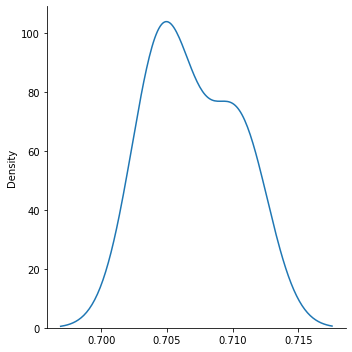

In [ ]:
sns.displot(resultados_random_forest, kind = 'kde');
#Visualização da distribuição normal

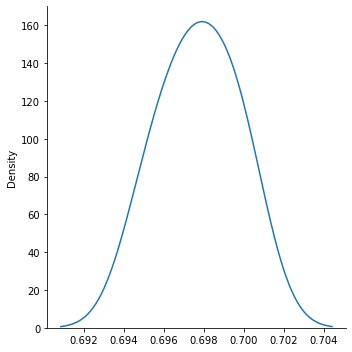

In [ ]:
sns.displot(resultados_svm, kind = 'kde');
#Visualização da distribuição normal

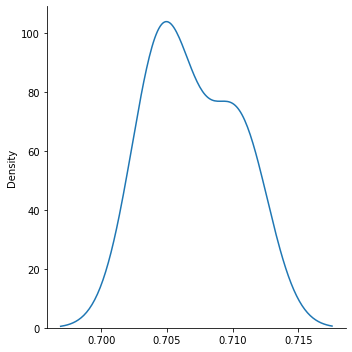

In [ ]:
sns.displot(resultados_rede_neural, kind = 'kde');
#Visualização da distribuição normal

## Teste hipótese


In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_random_forest, resultados_svm, resultados_rede_neural)
p
#Criando variavel para receber todos os resultados

0.0002675780925940894

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')#Os dados são diferentes
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')#Os dados são iguais, não existe diferença estatística entre eles

Hipótese nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_random_forest, resultados_svm, resultados_rede_neural]),
                         'algoritmo':['resultados_random_forest', 'resultados_random_forest', 'resultados_random_forest', 'resultados_random_forest', 'resultados_random_forest',
                                      'resultados_svm', 'resultados_svm', 'resultados_svm', 'resultados_svm', 'resultados_svm',
                                      'resultados_rede_neural', 'resultados_rede_neural', 'resultados_rede_neural', 'resultados_rede_neural', 'resultados_rede_neural']}

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Tabela para os resultados
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.704994,resultados_random_forest
1,0.710641,resultados_random_forest
2,0.710164,resultados_random_forest
3,0.703813,resultados_random_forest
4,0.705229,resultados_random_forest
5,0.698991,resultados_svm
6,0.696759,resultados_svm
7,0.700165,resultados_svm
8,0.697695,resultados_svm
9,0.695106,resultados_svm


In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])
#Comparando os resultados

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)
#Teste estatístico para comparar todos os grupos
#True significa que todos os algoritmos foram comprovados como diferentes ESTATISTICAMENTE entre si
#Caso desse false os algoritmos seriam identicos ESTATISTICAMENTE.

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
         group1                  group2         meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------------------
resultados_random_forest resultados_rede_neural      0.0   0.9 -0.0048  0.0048  False
resultados_random_forest         resultados_svm  -0.0092 0.001  -0.014 -0.0044   True
  resultados_rede_neural         resultados_svm  -0.0092 0.001  -0.014 -0.0044   True
-------------------------------------------------------------------------------------


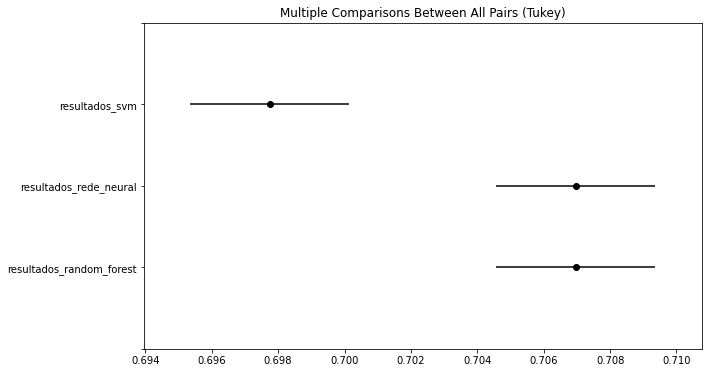

In [ ]:
teste_estatistico.plot_simultaneous();
#Gráfico para ilustração dos algoritmos

# Resultados Finais

In [ ]:
probabilidade_base = pd.DataFrame(random_forest_bra.predict_proba(jogos))

In [ ]:
x_base = pd.DataFrame(jogos)
df_r = brasileirao.loc[6030:, ['Time_Mandante', 'Time_Visitante','Resultado']].reset_index(drop=True)
df_rp = df_r.merge(probabilidade_base, left_index=True, right_index=True)
df_rprf = df_rp.merge(resultados, left_index =True, right_index=True)
df_rprf.tail(50)
#Tabela com os jogos e a probabilidade de cada evento

,Time_Mandante,Time_Visitante,Resultado,0,1,2,Random Forest,Rede neural,SVM,Valores Reais
0,Bragantino,Sport,1,0.232443,0.544835,0.222722,1,1,1,1
1,Atlético-MG,Juventude,1,0.214092,0.713033,0.072876,1,1,1,1
2,Fortaleza,Palmeiras,1,0.302008,0.274526,0.423466,2,1,1,1
3,Chapecoense,Grêmio,2,0.261215,0.335064,0.403720,2,2,2,2
4,Atlético-GO,Ceará,0,0.384823,0.330194,0.284983,0,0,0,0
5,Internacional,Flamengo,2,0.189402,0.416129,0.394469,1,1,1,2
6,Corinthians,Santos,1,0.275933,0.479152,0.244914,1,1,1,1
7,Fluminense,América-MG,1,0.292437,0.394289,0.313275,1,2,2,1
8,Bahia,Cuiabá,0,0.274973,0.450256,0.274771,1,1,1,0
9,São Paulo,Athlético-PR,0,0.371982,0.418506,0.209512,1,1,1,0


In [ ]:
print(accuracy_score(y_jogos, previsoes_rf_t))
print(accuracy_score(y_jogos, previsoes_svm_t))
print(accuracy_score(y_jogos, previsoes_rn_t))
print(accuracy_score(y_jogos, dados))

0.62
0.48
0.62
0.62


In [ ]:
pre1 = rede_neural_brasileirao.predict_proba(jogos)
pre2 = random_forest_bra.predict_proba(jogos)
pre3 = svm_brasileirao.predict_proba(jogos)

print('rede neural',pre1[42])
print('random     ', pre2[42])
print('svm        ',pre3[42])

rede neural [1.77116965e-03 9.98228042e-01 7.88034446e-07]
random      [0.30303611 0.49040635 0.20655754]
svm         [0.17066204 0.72931195 0.10002601]


In [ ]:
#pre[45]
# Random forest -       [0.28816738, 0.44291259, 0.26892003]
# Random Forest SMOTE - [0.30835616, 0.43943246, 0.25221138]

0.6941964285714286

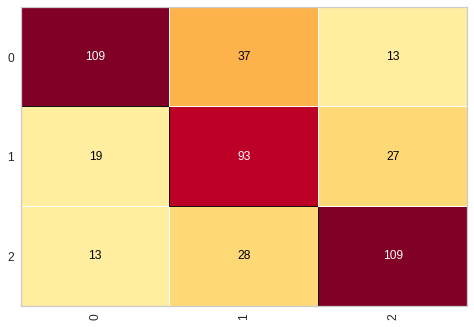

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
#cm = ConfusionMatrix(arvore_credit) corrigido 10/04/2021
cm = ConfusionMatrix(random_forest_bra)
cm.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over)
cm.score(X_brasileirao_teste_over, y_brasileirao_teste_over)

0.6986607142857143

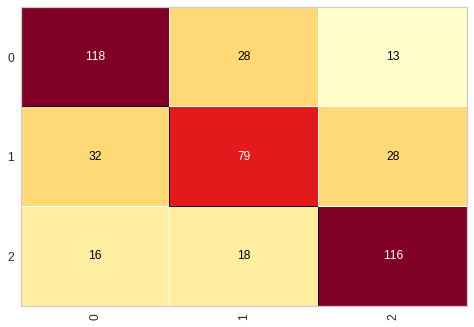

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
#cm = ConfusionMatrix(arvore_credit) corrigido 10/04/2021
cm = ConfusionMatrix(rede_neural_brasileirao)
cm.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over)
cm.score(X_brasileirao_teste_over, y_brasileirao_teste_over)

0.7209821428571429

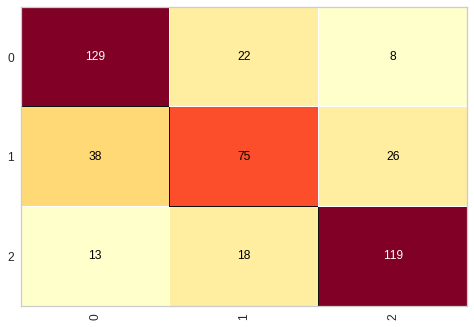

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
#cm = ConfusionMatrix(arvore_credit) corrigido 10/04/2021
cm = ConfusionMatrix(svm_brasileirao)
cm.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over)
cm.score(X_brasileirao_teste_over, y_brasileirao_teste_over)

In [ ]:
print(classification_report(y_brasileirao_teste_over, previsoes_rn))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       159
           1       0.67      0.60      0.64       139
           2       0.75      0.76      0.75       150

    accuracy                           0.73       448
   macro avg       0.72      0.72      0.72       448
weighted avg       0.73      0.73      0.73       448



In [ ]:
print(classification_report(y_brasileirao_teste_over, previsoes_rf))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       159
           1       0.63      0.72      0.67       139
           2       0.75      0.76      0.76       150

    accuracy                           0.74       448
   macro avg       0.74      0.74      0.74       448
weighted avg       0.75      0.74      0.74       448



In [ ]:
print(classification_report(y_brasileirao_teste_over, previsoes_svm))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       159
           1       0.64      0.53      0.58       139
           2       0.76      0.77      0.76       150

    accuracy                           0.71       448
   macro avg       0.70      0.70      0.70       448
weighted avg       0.71      0.71      0.71       448



In [ ]:
previ = rede_neural_brasileirao.predict(x_bt50)
previ
print(accuracy_score(y_jogos, previ))

0.62


In [ ]:
a = x_jogos.tolist()
#a = np.concatenate((x_jogos), axis=0)
a
type(a)

list

In [ ]:
jogos = len(x_jogos)
b = 0
i = 0
lista = []

for linha in a:
  svc = svm_brasileirao.predict(a)[i]
  rf = random_forest_bra.predict(a)[i]
  rn = rede_neural_brasileirao.predict(a)[i]
  print('valores', svc, rf, rn)
  i = i+1;
  if svc == rf:
    lista.append(svc)
  elif svc == rn:
    lista.append(svc)
  elif rf == rn:
    lista.append(rf)
  else:
    lista.append(rf)
print(lista)

valores 1 1 1
valores 1 1 1
valores 1 2 1
valores 2 2 2
valores 0 0 0
valores 1 1 1
valores 1 1 1
valores 2 1 2
valores 1 1 1
valores 1 1 1
valores 1 1 0
valores 0 0 1
valores 0 1 1
valores 0 1 1
valores 1 1 1
valores 1 1 1
valores 1 1 1
valores 2 1 0
valores 1 1 1
valores 1 2 1
valores 1 1 0
valores 2 2 2
valores 2 1 1
valores 1 1 0
valores 0 1 1
valores 1 1 1
valores 1 1 1
valores 1 1 1
valores 1 1 1
valores 2 1 2
valores 1 1 2
valores 1 1 1
valores 0 1 1
valores 1 1 1
valores 0 1 0
valores 0 2 0
valores 1 1 1
valores 1 1 0
valores 2 2 2
valores 1 1 2
valores 1 1 1
valores 1 1 1
valores 1 1 1
valores 0 1 1
valores 2 1 2
valores 2 2 1
valores 0 1 0
valores 0 1 1
valores 0 1 0
valores 0 0 1
[1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0]


In [ ]:
print(accuracy_score(lista, y_jogos))

0.62


# Gráficos

In [ ]:
from matplotlib import pyplot
import seaborn as sns

In [ ]:
corinthians = brasileirao[brasileirao['Time_Mandante'] == 'São Paulo']

In [ ]:
saopaulo = df_rprf[df_rprf['Time_Mandante']== 'Corinthians']
saopaulo.head(5)


,Time_Mandante,Time_Visitante,Resultado,0,1,2,Random Forest,Rede neural,SVM,Valores Reais
6,Corinthians,Santos,1,1.983958e-04,0.977480,2.232187e-02,2,1,1,1
24,Corinthians,Athlético-PR,1,5.870108e-02,0.941298,9.725870e-07,0,1,1,1
30,Corinthians,Grêmio,0,2.130537e-07,0.999978,2.130812e-05,1,1,1,0


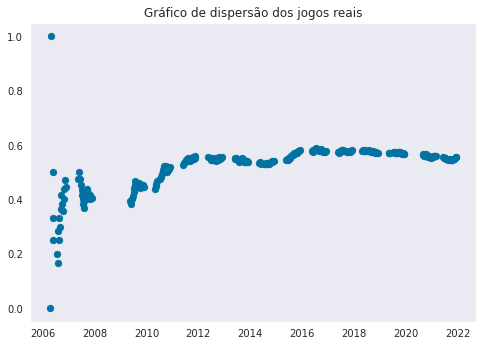

In [ ]:
pyplot.scatter(corinthians['Data'], corinthians['Perc_CasaV'])
pyplot.title('Gráfico de dispersão dos jogos reais')
pyplot.show()

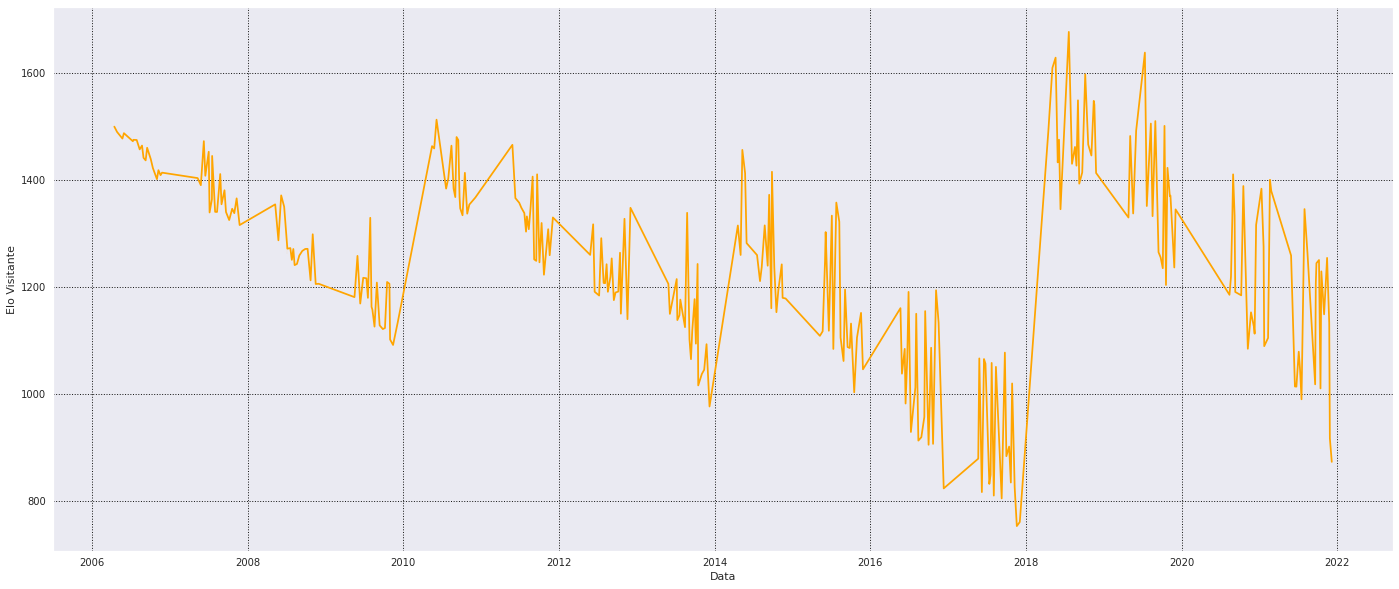

In [ ]:
sns.set_style('darkgrid', {"grid.color": ".10", "grid.linestyle": ":"})
plt.figure(figsize=(24, 10))

# Gráfico de Dispersão
g = sns.lineplot(x="Data", y="Elo Visitante", data=corinthians, color = 'orange', )
plt.show()

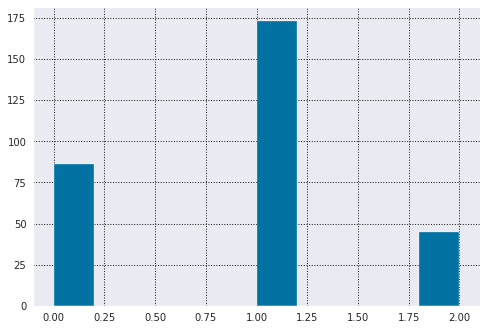

In [ ]:
plt.hist(x = corinthians['Resultado']);

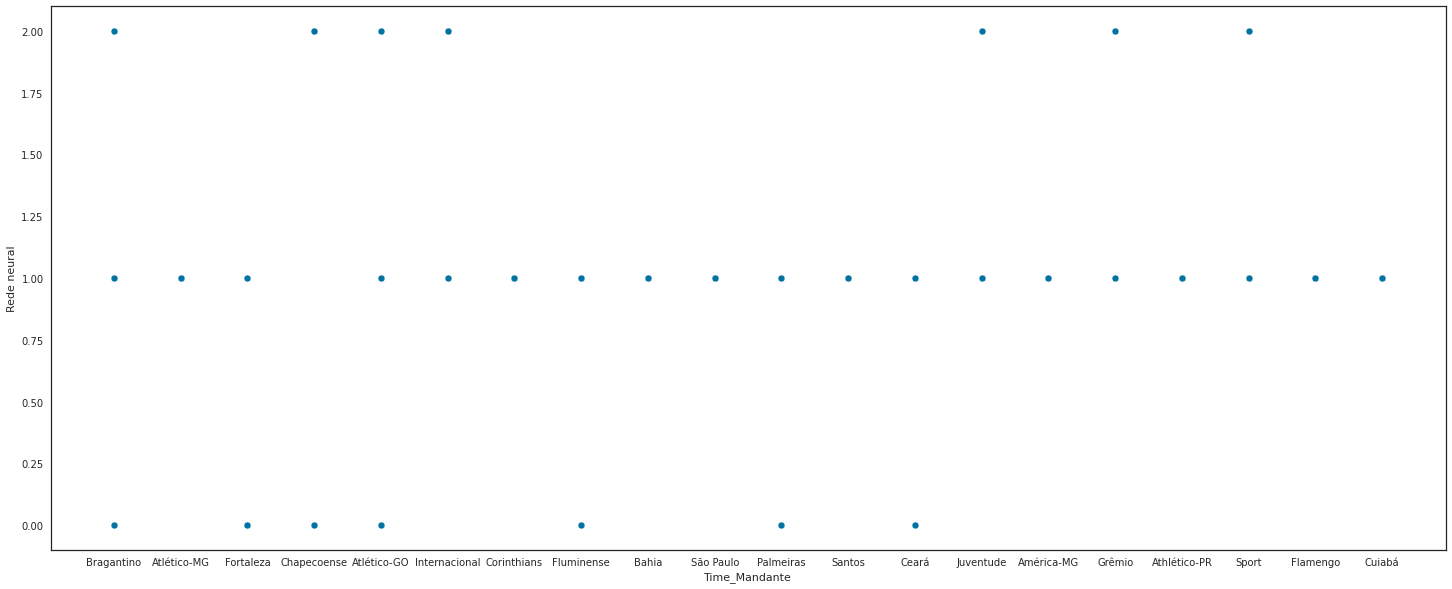

In [ ]:
sns.set_style("white")
plt.figure(figsize=(25, 10))

# Gráfico de Dispersão
g = sns.scatterplot(x="Time_Mandante", y="Rede neural", 
                    data=df_rprf)
plt.show()

0.6

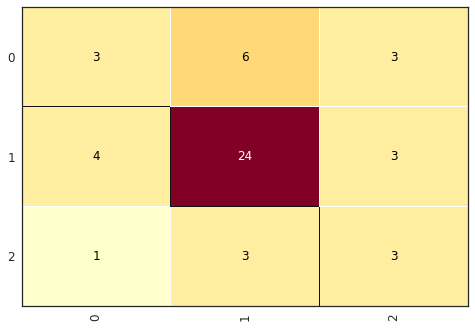

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_brasileirao)
cm.fit(X_brasileirao_treinamento_over, y_brasileirao_treinamento_over)
#cm.score(X_brasileirao_teste_over, y_brasileirao_teste_over)
cm.score(x_jogos_s, y_jogos)

In [ ]:
grafico = px.scatter_matrix(brasileirao, dimensions=['ID_Mandante', 'ID_Visitante', 'Arena'], color = 'Resultado') #Gráfico de dispersão x e y
grafico.show()

In [ ]:
grafico2 = px.parallel_categories(df_rprf, dimensions=['Rede neural','Valores Reais', 'Random Forest', 'SVM'])
grafico2.show()

In [ ]:
sns.heatmap(corinthians.corr())

NameError: ignored

# Gerando o arquivo treinado .sav

In [ ]:
import pickle

In [ ]:
#Salvar
import pickle
pickle.dump(random_forest_bra, open('random_forest_SMOTE.sav', 'wb'))

In [ ]:
pickle.dump(svm_brasileirao, open('svm_SMOTE.sav', 'wb'))

In [ ]:
pickle.dump(rede_neural_brasileirao, open('rede_neural_SMOTE.sav', 'wb'))

In [ ]:
with open('x_jogos.pkl', mode = 'wb') as f:
  pickle.dump([x_jogos], f)

In [ ]:
with open('y_jogos.pkl', mode = 'wb') as f:
  pickle.dump([y_jogos], f)

In [ ]:
x_jogosreais = pickle.load(open('/content/x_jogos_s.pkl', 'rb'))

In [ ]:
x_50 = np.concatenate((x_jogosreais), axis = 0)

In [ ]:
teste = x_jogos_s[1]

In [ ]:
x_50[1]

array([-1.41421356,  0.60860295, -1.09584789,  0.63381674,  1.10663156,
       -1.25707367,  1.54521247, -0.46468211,  0.31329598,  2.30263656,
        1.24867375, -1.70657523,  0.58131293, -0.14549976,  2.08413814,
       -1.51143764, -1.78752343, -0.71839635,  0.6552104 , -0.26927154,
        0.        , -0.44183608,  3.02619375, -0.91779179, -0.46852129,
        1.57519928, -1.87273426, -0.72149069, -0.81453899, -0.12013248,
       -0.25091551, -0.92728754, -0.34704545, -1.2216664 ])

In [ ]:
#Carregar
import pickle
random_forest = pickle.load(open('rede_neural_finalizado.sav', 'rb'))

In [ ]:
d = pd.DataFrame(data = x_jogos_s)
d.to_excel('xpadronizado.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  
